## Comparing test and predicted values of 'air_passengers' time-series dataset

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

### Using the ‘air_passengers.csv’ dataset.

In [2]:
air_passengers=pd.read_csv("air_passengers.csv",index_col='Month',parse_dates=True)

In [3]:
air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


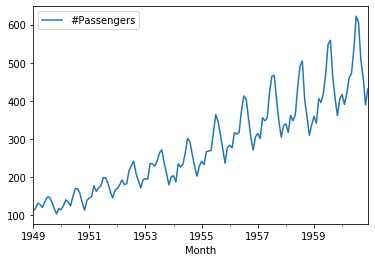

In [4]:
air_passengers.plot()

### Using ‘ETS Decomposition’ to separate different components of a time series. 

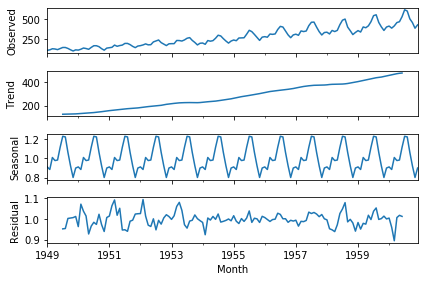

In [5]:
components=seasonal_decompose(air_passengers, model='multiplicative')
components.plot()
plt.show()

### What is the trend? Is there any seasonality? What are the other components of a time series?

- Trend: The trend shows the tendency of the data to increase or decrease for a long period of time. From the plots above, there is an upward trend.
- The data seems to have a seasonality too as the pattern repeats at regular intervals of time.
- The other components of time-series are cyclical and random variations.

### Providing the autocorrelation plot using ‘pandas.plotting.’ What information does an autocorrelation plot provide? 

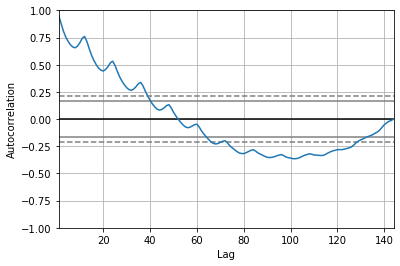

In [6]:
autocorrelation_plot(air_passengers)

The autocorrelation plot is a visual way to show serial correlation in data that changes over time. The autocorrelation plot is designed to show if the elements of time series are positively correlated, negatively correlated, or independent of each other. Example: finding correlation between points separated by time lags.<br>
There is a statistical relation of lags from 0 to around 37 and from 70 to 130 approximately. And the number of passengers from around 40 to 70 are not highly correlated, the same follows for the lags 130 to 144.

### Providing the residual plot. What does it say? Are the errors Gaussian and centered to zero or not?

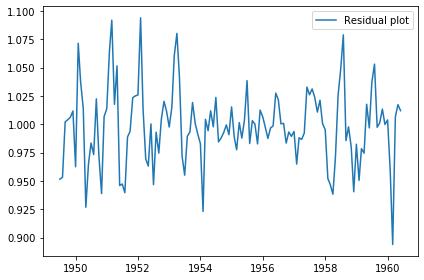

In [7]:
residual_plot=components.resid
plt.plot(residual_plot, label ='Residual plot')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

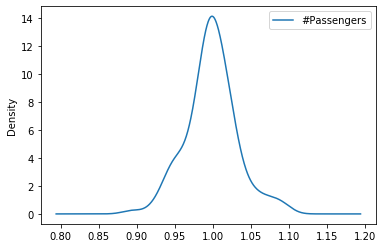

In [8]:
residual_plot.plot(kind='kde')

We can see, from the graph, that the Gaussian Errors are not centered to zero.

### Using the ARIMA(2,1,2) model

In [9]:
X = air_passengers.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model=ARIMA(history,order=(2,1,2))
    model_fit=model.fit(disp=0)
    output=model_fit.forecast()
    pred=output[0]
    predictions.append(pred)
    obs=test[i]
    history.append(obs)
    print('predicted=%f expected=%f' % (pred,obs))

predicted=273.192544 expected=306.000000
predicted=323.309967 expected=315.000000
predicted=343.625768 expected=301.000000
predicted=312.743004 expected=356.000000
predicted=369.699096 expected=348.000000
predicted=328.560243 expected=355.000000
predicted=366.861888 expected=422.000000
predicted=412.661813 expected=465.000000
predicted=444.617922 expected=467.000000
predicted=439.272562 expected=404.000000
predicted=372.179286 expected=347.000000
predicted=346.717297 expected=305.000000
predicted=291.934484 expected=336.000000
predicted=344.104091 expected=340.000000
predicted=362.244905 expected=318.000000
predicted=335.319319 expected=362.000000
predicted=380.575332 expected=348.000000
predicted=339.977772 expected=363.000000
predicted=385.826926 expected=435.000000
predicted=433.258721 expected=491.000000
predicted=478.360800 expected=505.000000
predicted=474.553359 expected=404.000000
predicted=367.686854 expected=359.000000
predicted=386.043821 expected=310.000000
predicted=300.55

D:\Python\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=349.941687 expected=405.000000
predicted=415.817522 expected=417.000000
predicted=443.407963 expected=391.000000
predicted=432.877466 expected=419.000000
predicted=467.788378 expected=461.000000
predicted=505.289456 expected=472.000000
predicted=505.208559 expected=535.000000
predicted=548.678083 expected=622.000000
predicted=603.221595 expected=606.000000
predicted=560.788100 expected=508.000000
predicted=458.397476 expected=461.000000
predicted=419.495889 expected=390.000000
predicted=373.834461 expected=432.000000


In [10]:
model=ARIMA(air_passengers,order=(2,1,2))
model_fit=model.fit(disp=0)
print(model_fit.summary())

D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.711
Date:                Sun, 26 Apr 2020   AIC                           1344.043
Time:                        12:59:32   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5312      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passeng

In [11]:
print('ARIMA MSE: {:.3f} '.format(mean_squared_error(test,predictions)))

ARIMA MSE: 1607.545 


### Plotting test vs. prediction values.

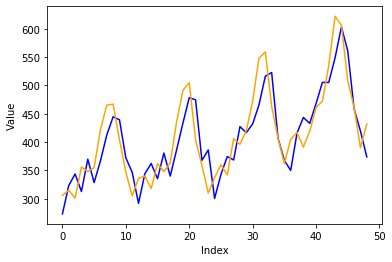

In [12]:
plt.plot(predictions,color='blue')
plt.plot(test,color='orange')
plt.xlabel('Index')
plt.ylabel('Value')
figsize=(20,15)